Ejercicio Guiado: Clasificación de prendas de vestir

La empresa Mnist Fashion cuenta con 60.000 imágenes para ser entrenadas y
cuenta con otras 10.000 imágenes que sirven para evaluar la precisión de
nuestro modelo en clasificar las prendas, cabe resaltar que todas las imágenes
están con una dimensión de 28 por 28px y tenemos 10 tipos de clases de ellas,
donde podemos encontrar abrigos, poleras, zapatillas, tacones, entre otros.


1. Instale el ambiente de Tensorflow
2. Carga de la data
3. Descripción de la base de datos
4. Configuración de la red neuronal
5. Compilación de la red neuronal
6. Entrenamiento de la red
7. Predicción y conclusión.

In [ ]:
# 1. Instale el ambiente de Tensorflow
!pip install tensorflow

In [ ]:
# 2. Carga de la data
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import keras

# Cargar el conjunto de datos Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
# 3. Descripción de la base de datos
# Dividir en conjuntos de entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:")
print("Imágenes de entrenamiento:", train_images.shape)
print("Etiquetas de entrenamiento:", train_labels.shape)
print("\nDimensiones del conjunto de prueba:")
print("Imágenes de prueba:", test_images.shape)
print("Etiquetas de prueba:", test_labels.shape)

Dimensiones del conjunto de entrenamiento:
Imágenes de entrenamiento: (60000, 28, 28)
Etiquetas de entrenamiento: (60000,)

Dimensiones del conjunto de prueba:
Imágenes de prueba: (10000, 28, 28)
Etiquetas de prueba: (10000,)


In [ ]:
# 4. Configuración de la red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Configuración de la red neuronal
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Capa de aplanado para convertir las imágenes en vectores
    Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y función de activación ReLU
    Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una por clase) y función de activación Softmax
])

# Resumen de la arquitectura de la red
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 5. Compilación de la red neuronal
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 6. Entrenamiento de la red
X_train, y_train = train_images, train_labels
X_test, y_test = test_images, test_labels

# Entrenamiento de la red neuronal
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4587 - accuracy: 0.8419
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4639 - accuracy: 0.8418
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4485 - accuracy: 0.8452
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4529 - accuracy: 0.8471
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4467 - accuracy: 0.8496
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4522 - accuracy: 0.8474
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4476 - accuracy: 0.8490
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4491 - accuracy: 0.8493
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4412 - accuracy: 0.8507
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.440

In [ ]:
# 7. Predicción y conclusión.
import numpy as np

# Preprocesar los datos de prueba (normalización)
X_test = X_test / 255.0

# Realizar predicciones
predictions = model.predict(X_test)

# Concluir sobre las predicciones
# Por ejemplo, puedes imprimir las primeras 10 predicciones
for i in range(10):
    print("Predicción:", np.argmax(predictions[i]))
    print("Etiqueta real:", y_test[i])
    print()  # Salto de línea para mayor claridad

313/313 [==============================] - 1s 1ms/step
Predicción: 2
Etiqueta real: 9

Predicción: 2
Etiqueta real: 2

Predicción: 2
Etiqueta real: 1

Predicción: 2
Etiqueta real: 1

Predicción: 2
Etiqueta real: 6

Predicción: 2
Etiqueta real: 1

Predicción: 2
Etiqueta real: 4

Predicción: 2
Etiqueta real: 6

Predicción: 2
Etiqueta real: 5

Predicción: 2
Etiqueta real: 7



In [ ]:
from sklearn.metrics import accuracy_score

# Convertir las predicciones a clases (0 o 1)
predicted_classes = np.argmax(predictions, axis=1)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predicted_classes)

# Imprimir la precisión del modelo
print("Precisión del modelo:", accuracy)

# Conclusiones
if accuracy > 0.8:
    print("El modelo tiene una precisión alta y puede ser útil para clasificar las prendas con una precisión aceptable.")
else:
    print("La precisión del modelo es baja y puede necesitar ajustes adicionales para mejorar su rendimiento en la clasificación de prendas.")

Precisión del modelo: 0.1241
La precisión del modelo es baja y puede necesitar ajustes adicionales para mejorar su rendimiento en la clasificación de prendas.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

# Dividir el conjunto de datos en entrenamiento y prueba
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Definir los nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Verificar la forma y el tamaño del conjunto de entrenamiento
train_images.shape
len(train_labels)

60000

In [ ]:
# Mostrar algunas etiquetas de entrenamiento
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# Verificar la forma y el tamaño del conjunto de prueba
test_images.shape
len(test_labels)

10000

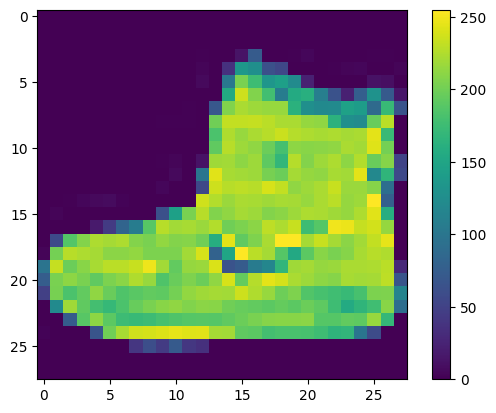

In [ ]:
# Visualizar una imagen de entrenamiento
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Normalizar los valores de píxeles de las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

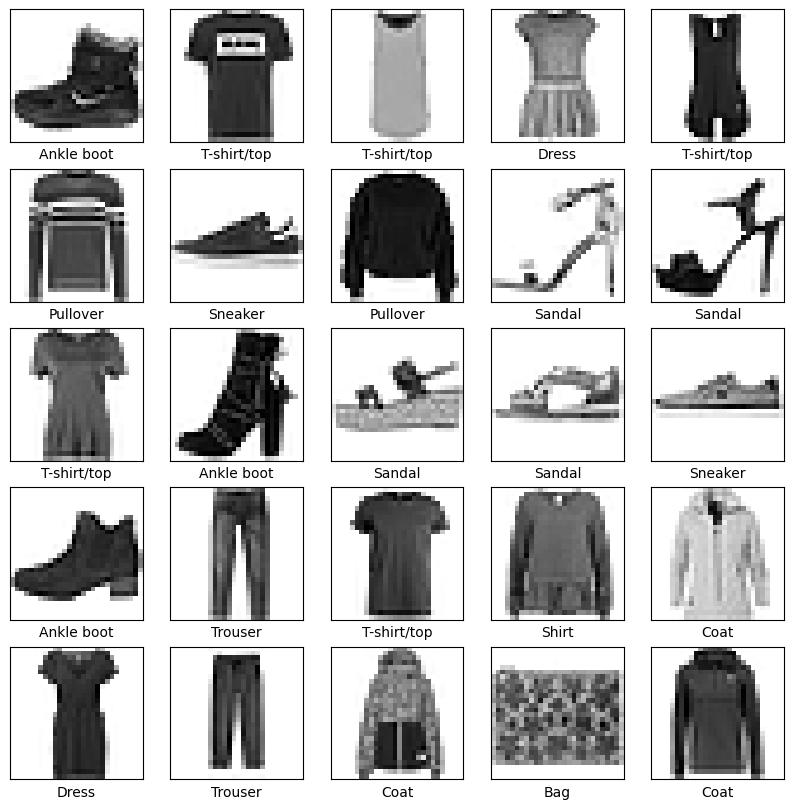

In [ ]:
# Visualizar algunas imágenes de entrenamiento con sus etiquetas correspondientes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Construir el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Entrenar el modelo
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4939 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3746 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3358 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3106 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2945 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2772 - accuracy: 0.8979
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2644 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2557 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2455 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.237

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nPrueba de exactitud:', test_acc)

313/313 - 1s - loss: 0.3415 - accuracy: 0.8822 - 1s/epoch - 4ms/step

Prueba de exactitud: 0.8822000026702881


In [ ]:
# Realizar predicciones sobre el conjunto de prueba
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
# Función para visualizar una imagen y su etiqueta predicha
def plot_image(i, predictions_array, true_label, img):
    # Seleccionar la predicción, la etiqueta verdadera y la imagen correspondiente
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]

    # Configurar el gráfico
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Mostrar la imagen en escala de grises
    plt.imshow(img, cmap=plt.cm.binary)

    # Obtener la etiqueta predicha y la confianza
    predicted_label = np.argmax(predictions_array)
    confidence = 100 * np.max(predictions_array)

    # Establecer el color de la etiqueta según si es correcta o incorrecta
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    # Agregar etiqueta con el nombre de la clase, la confianza y la etiqueta verdadera
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], confidence, class_names[true_label]), color=color)

In [ ]:
# Función para visualizar el valor de confianza de cada clase para una imagen
def plot_value_array(i, predictions_array, true_label):
    # Seleccionar la predicción y la etiqueta verdadera para la imagen i
    predictions_array, true_label = predictions_array, true_label[i]

    # Configurar el gráfico
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    # Crear una barra para mostrar la confianza de cada clase
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    # Obtener la etiqueta predicha y la verdadera
    predicted_label = np.argmax(predictions_array)

    # Marcar la barra correspondiente a la etiqueta predicha con rojo y la verdadera con azul
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

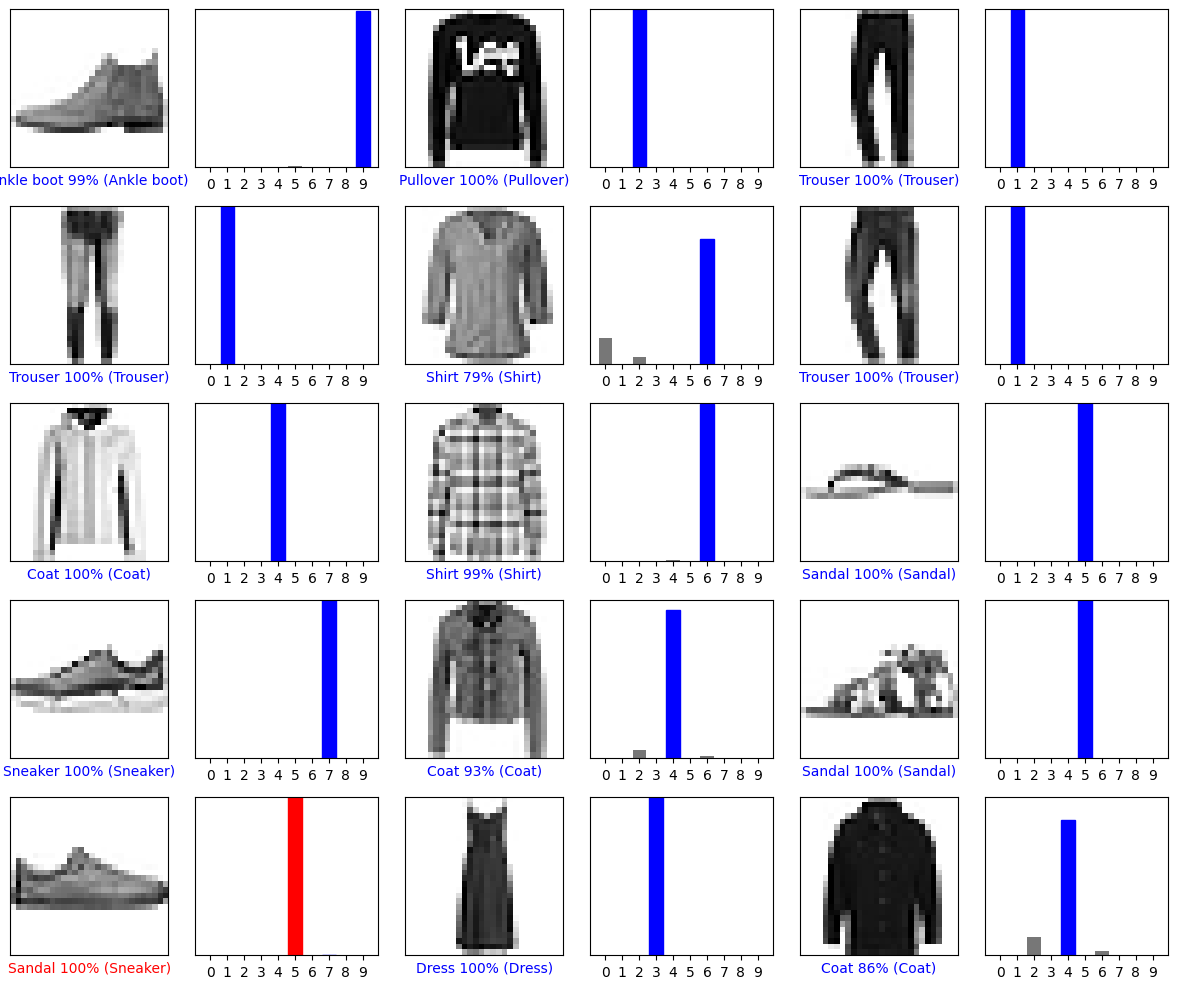

In [ ]:
# Visualizar algunas imágenes y sus predicciones
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 47ms/step
[[2.5848422e-04 7.7419727e-16 9.9735558e-01 2.0271882e-14 2.2265727e-03
  1.5524688e-13 1.5938637e-04 2.7256381e-18 8.0347473e-12 6.5404466e-15]]


2

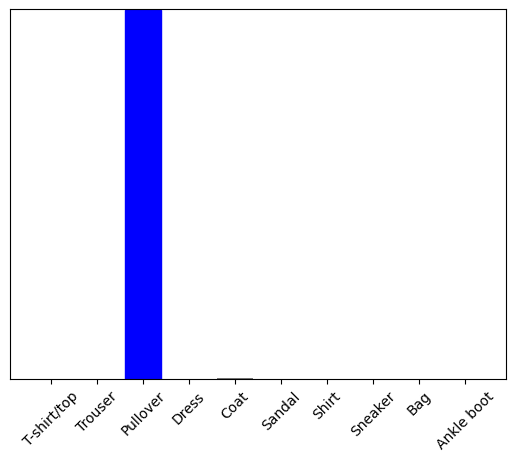

In [ ]:
# Realizar predicciones para una sola imagen
img = test_images[1]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])